In [1]:
using Plots
using LinearAlgebra

Let's say we're going to use a NACA 0012 airfoil (i.e. symmetric, 12:100 max thickness to cord length), as this has a relatively high peak Cl/Cd while still being fairly simple. The peak Cl/Cd is right around an angle of attack of 5 degrees, with a Cl of 0.6 across all Reynolds numbers at this point, and a Cd ranging from 0.0125 to 0.0250 at this same angle of attack.

$$
F_d = C_d \cdot \frac{1}{2} \rho u^2 A\\~\\
F_l = C_l \cdot \frac{1}{2} \rho u^2 A
$$

As shown in the above formulas, drag and lift forces ought to remain roughly proportional. Since motor power usage will be set proportionally by the steady state drag torque, this means that lift will in turn be linearly proportional to motor power output (as seen previously with OpenHELL). Let's get some numbers going.

In [2]:
C_l = 0.6       # unitless, Lift coefficient
C_d = 0.01875   # unitless, Drag coefficient
ρ = 1.225       # kg/m³, density of air at sea level (which Norwalk is literally at)

Fd(u, A) = C_d/2 * ρ * u^2 * A
Fl(u, A) = C_l/2 * ρ * u^2 * A

Fl (generic function with 1 method)

Now, let's consider what is needed to move the robot.

In [3]:
m = 4.5 / 2.2   # kg, robot mass with weight bonus
μ = 0.4         # unitless, friction coefficient between pivot and wood floor, likely high
g = 9.8         # m/s², acceleration due to gravity

Fn(u, A, θ) = m * g - Fl(u, A) * cos(θ)
Ff(u, A, θ) = clamp(μ * Fn(u, A, θ), 0, Inf)
Fx(u, A, θ) = Fl(u, A) * sin(θ)
P(u, A) = u * Fd(u, A)

P (generic function with 1 method)

In [4]:
t = 0.25 * 25.4e-3  # m, 1/4 in thick blade
c = t / 0.12        # m, coord length
s = 4 * 25.4e-3     # m, wingspan

0.1016

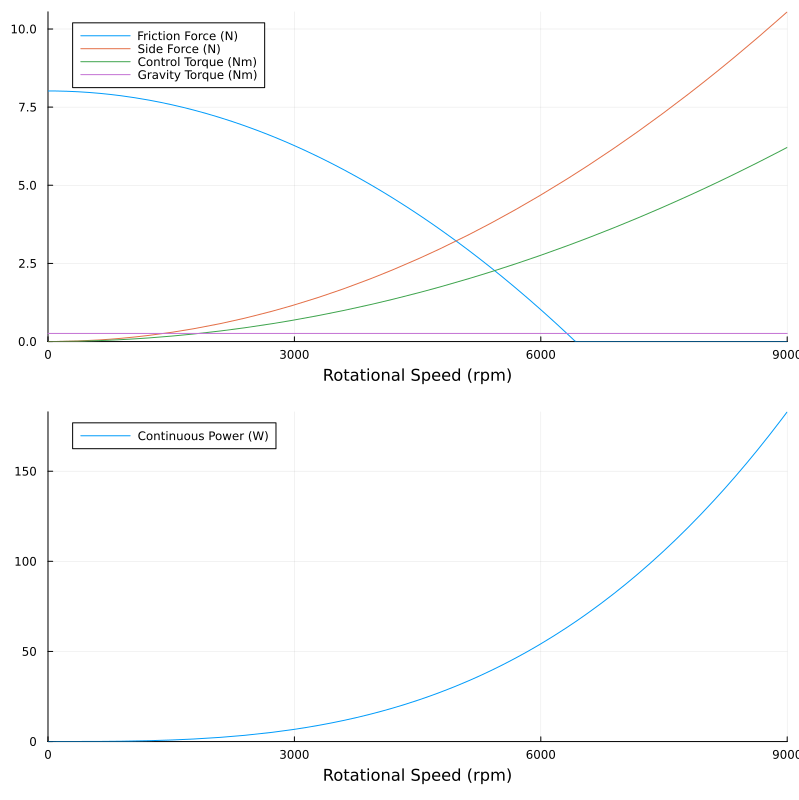

In [5]:
A = c * s           # m², wing notional area
θ = 15 / 180 * π    
d = 8 * 25.4e-3     # m, robot round diameter
r = d/2 + s/2       # m, wing effective radius

v(rpm) = r * (rpm/60 * 2π)

p1 = plot(xlim=(0, 9000), ylim=(0, Inf), xlabel="Rotational Speed (rpm)")
plot!(p1, rpm -> Ff(v(rpm), A, θ), label="Friction Force (N)")
plot!(p1, rpm -> Fx(v(rpm), A, θ), label="Side Force (N)")
plot!(p1, rpm -> r * Fl(v(rpm), A), label="Control Torque (Nm)")
plot!(p1, rpm -> 2*25e-3 * m * g * sin(θ), label="Gravity Torque (Nm)")

p2 = plot(xlim=(0, 9000), ylim=(0, Inf), xlabel="Rotational Speed (rpm)")
plot!(p2, rpm -> P(v(rpm), A), label="Continuous Power (W)")

plot(p1, p2, layout=(2,1), size=(800, 800))

In [6]:
# Say we want to operate at 7500 rpm, and on a 6s battery. What kV does our hub motor need to be?
kV = 7500 / (6 * 3.7)

# 340 kV should be achievable.

337.8378378378378

In [7]:
# How much energy does a 2Ahr 6s battery hold?
@show U = (2 * 60 * 60) * 6 * 3.7

# How long could that run 500 W for?
@show U / 500

@show 5 / m

U = (2 * 60 * 60) * 6 * 3.7 = 159840.0
U / 500 = 319.68
5 / m = 2.4444444444444446


2.4444444444444446

In [ ]:
# Motor design calcs
B = 2451 / 1e4  # Tesla, surface field strength of magnets (hopefully we get most of it)
Np = 28         # Number of permanent magnet poles
Nt = 10         # Number of turns

ke = 1 / (kV / 60 * 2π)

# Cross-sectional area per coil needed to achieve the above kV
A = ke * π / (Np * Nt * B)/4

@show l = sqrt(A)
@show π * d / 24
@show A / (π * d / 24)

l = sqrt(A) = 0.017985636669873628
(π * d) / 24 = 0.02659881780039358


0.02659881780039358